In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
df_air_quality = pd.read_csv("Air_Quality_Data.csv")
df_EV = pd.read_csv("EV_Data.csv")

In [68]:
print(df_air_quality.head())
print(df_EV.head())

         date        city  latitude  longitude   pm25   pm10     o3    no2  \
0  2019-01-01  Montgomery   32.3777      -86.3  10.01  20.17  21.14  15.27   
1  2019-01-02  Montgomery   32.3777      -86.3  15.09  31.87  38.12  13.91   
2  2019-01-03  Montgomery   32.3777      -86.3  12.38  29.62  40.72  25.84   
3  2019-01-04  Montgomery   32.3777      -86.3   9.55  23.36  34.85  19.75   
4  2019-01-05  Montgomery   32.3777      -86.3  10.27  24.34  30.68  24.84   

    so2    co  ...  wind_speed_mps  month  day  year  day_of_week  hour  \
0  6.31  0.42  ...             8.2      1    1  2019            1     0   
1  3.39  0.45  ...             4.5      1    2  2019            2     0   
2  5.49  0.57  ...             2.3      1    3  2019            3     0   
3  3.30  0.46  ...             8.0      1    4  2019            4     0   
4  4.93  0.54  ...             4.0      1    5  2019            5     0   

   is_weekend  day_of_year  season  AQI_Category  
0           0            1  W

In [69]:
df_EV.drop_duplicates(inplace=True)
df_EV.dropna(inplace=True)
df_air_quality.drop_duplicates(inplace=True)
df_air_quality.dropna(inplace=True)

In [70]:
print(df_EV.isna().sum())
print(df_air_quality.isna().sum())

Unnamed: 0.1                             0
Unnamed: 0                               0
state                                    0
year                                     0
EV Registrations                         0
Total Vehicles                           0
EV Share (%)                             0
Stations                                 0
Total Charging Outlets                   0
Level 1                                  0
Level 2                                  0
DC Fast                                  0
fuel_economy                             0
Incentives                               0
Number of Metro Organizing Committees    0
Population_20_64                         0
Education_Bachelor                       0
Labour_Force_Participation_Rate          0
Unemployment_Rate                        0
Bachelor_Attainment                      0
Per_Cap_Income                           0
affectweather                            0
devharm                                  0
discuss    

In [71]:
assert df_EV.isnull().sum().sum() == 0
assert df_air_quality.isnull().sum().sum() == 0
print("All NA and duplicate rows dropped")

All NA and duplicate rows dropped


In [72]:
df_EV["state"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [73]:
df_EV.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'state', 'year', 'EV Registrations',
       'Total Vehicles', 'EV Share (%)', 'Stations', 'Total Charging Outlets',
       'Level 1', 'Level 2', 'DC Fast', 'fuel_economy', 'Incentives',
       'Number of Metro Organizing Committees', 'Population_20_64',
       'Education_Bachelor', 'Labour_Force_Participation_Rate',
       'Unemployment_Rate', 'Bachelor_Attainment', 'Per_Cap_Income',
       'affectweather', 'devharm', 'discuss', 'exp', 'localofficials',
       'personal', 'reducetax', 'regulate', 'worried', 'price_cents_per_kwh',
       'gasoline_price_per_gallon', 'Total', 'Trucks', 'Trucks_Share',
       'Party'],
      dtype='object')

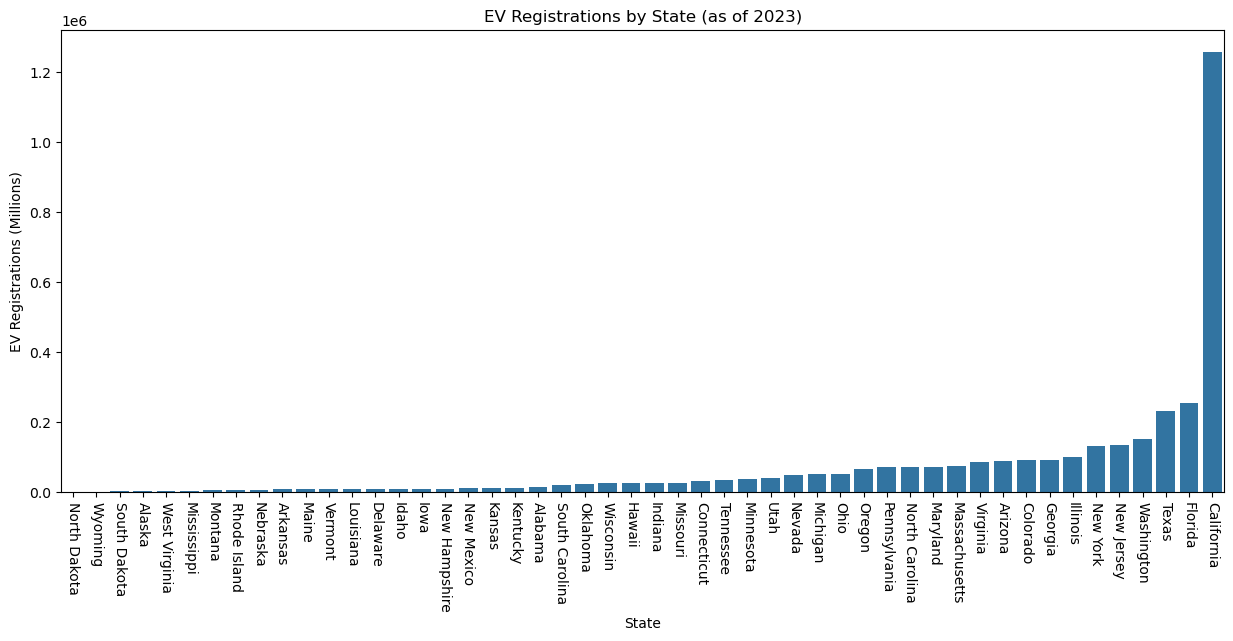

In [74]:
df_2023 = df_EV[df_EV["year"] == 2023]
plt.figure(figsize = (15, 6))
sns.barplot(data = df_2023.sort_values(by = "EV Registrations"), x = "state", y = "EV Registrations")
plt.xticks(rotation = -90)
plt.title("EV Registrations by State (as of 2023)")
plt.xlabel("State")
plt.ylabel("EV Registrations (Millions)")
plt.show()

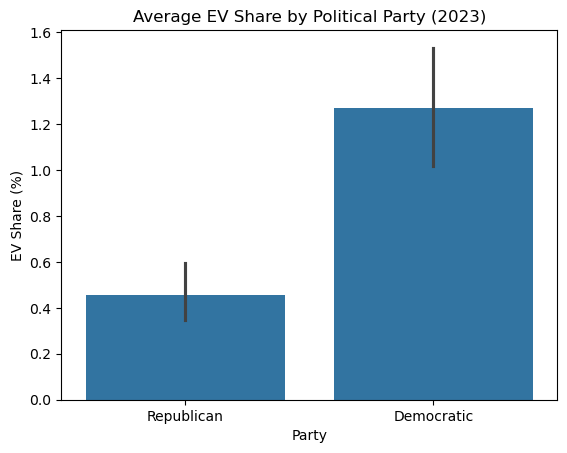

In [75]:
sns.barplot(data = df_2023, x = "Party", y = "EV Share (%)")
plt.title("Average EV Share by Political Party (2023)")
plt.show()

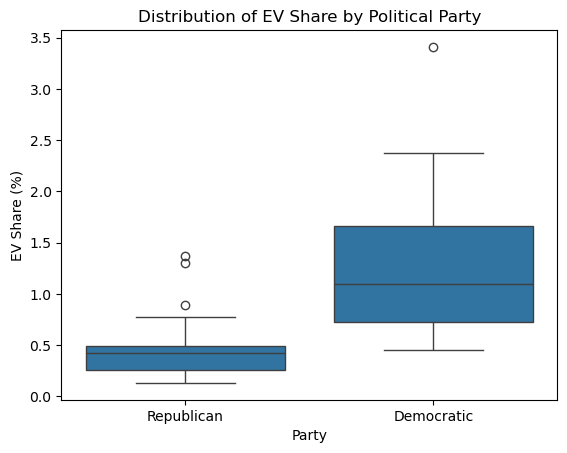

In [76]:
sns.boxplot(data = df_2023, x = "Party", y = "EV Share (%)")
plt.title("Distribution of EV Share by Political Party")
plt.show()

In [77]:
df_air_quality["city"].unique()

array(['Montgomery', 'Juneau', 'Phoenix', 'Little Rock', 'Sacramento',
       'Denver', 'Hartford', 'Dover', 'Tallahassee', 'Atlanta',
       'Honolulu', 'Boise', 'Springfield', 'Indianapolis', 'Des Moines',
       'Topeka', 'Frankfort', 'Baton Rouge', 'Augusta', 'Annapolis',
       'Boston', 'Lansing', 'Saint Paul', 'Jackson', 'Jefferson City',
       'Helena', 'Lincoln', 'Carson City', 'Concord', 'Trenton',
       'Santa Fe', 'Albany', 'Raleigh', 'Bismarck', 'Columbus',
       'Oklahoma City', 'Salem', 'Harrisburg', 'Providence', 'Columbia',
       'Pierre', 'Nashville', 'Austin', 'Salt Lake City', 'Montpelier',
       'Richmond', 'Olympia', 'Charleston', 'Madison', 'Cheyenne',
       'Washington'], dtype=object)

In [78]:
states = {
    'Montgomery': 'Alabama',
    'Juneau': 'Alaska',
    'Phoenix': 'Arizona',
    'Little Rock': 'Arkansas',
    'Sacramento': 'California',
    'Denver': 'Colorado',
    'Hartford': 'Connecticut',
    'Dover': 'Delaware',
    'Tallahassee': 'Florida',
    'Atlanta': 'Georgia',
    'Honolulu': 'Hawaii',
    'Boise': 'Idaho',
    'Springfield': 'Illinois',
    'Indianapolis': 'Indiana',
    'Des Moines': 'Iowa',
    'Topeka': 'Kansas',
    'Frankfort': 'Kentucky',
    'Baton Rouge': 'Louisiana',
    'Augusta': 'Maine',
    'Annapolis': 'Maryland',
    'Boston': 'Massachusetts',
    'Lansing': 'Michigan',
    'Saint Paul': 'Minnesota',
    'Jackson': 'Mississippi',
    'Jefferson City': 'Missouri',
    'Helena': 'Montana',
    'Lincoln': 'Nebraska',
    'Carson City': 'Nevada',
    'Concord': 'New Hampshire',
    'Trenton': 'New Jersey',
    'Santa Fe': 'New Mexico',
    'Albany': 'New York',
    'Raleigh': 'North Carolina',
    'Bismarck': 'North Dakota',
    'Columbus': 'Ohio',
    'Oklahoma City': 'Oklahoma',
    'Salem': 'Oregon',
    'Harrisburg': 'Pennsylvania',
    'Providence': 'Rhode Island',
    'Columbia': 'South Carolina',
    'Pierre': 'South Dakota',
    'Nashville': 'Tennessee',
    'Austin': 'Texas',
    'Salt Lake City': 'Utah',
    'Montpelier': 'Vermont',
    'Richmond': 'Virginia',
    'Olympia': 'Washington',
    'Charleston': 'West Virginia',
    'Madison': 'Wisconsin',
    'Cheyenne': 'Wyoming',
    'Washington': 'Washington, D.C.'
}

In [79]:
df_air_quality["state"] = df_air_quality["city"].map(states)
df_air_quality["state"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'Washington, D.C.'], dtype=object)

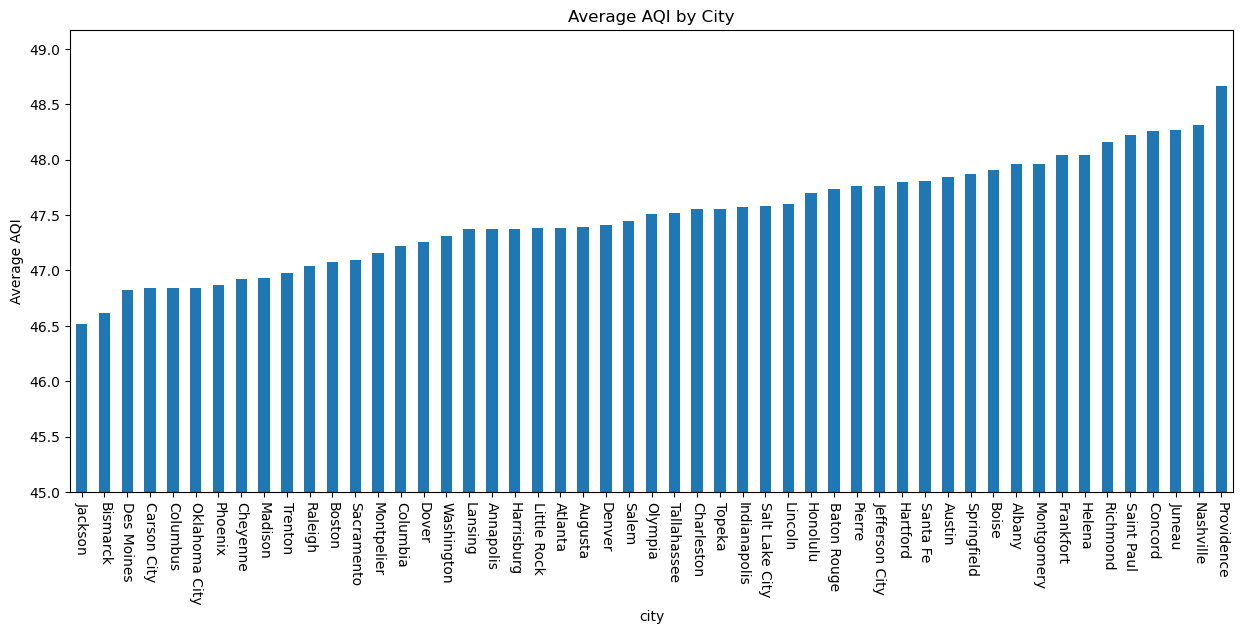

In [91]:
city_aqi = df_air_quality.groupby("city")["aqi"].mean().sort_values(ascending = True)
city_aqi.plot(kind = "bar", figsize = (15, 6))
plt.xticks(rotation = -90)
plt.title("Average AQI by City")
plt.ylabel("Average AQI")
plt.ylim(45, city_aqi.max() + .5)
plt.show()

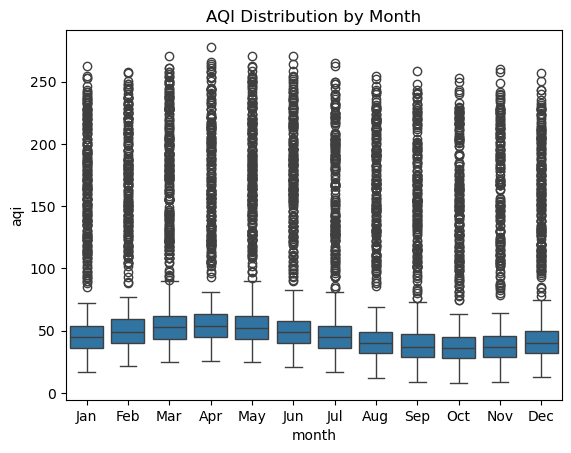

In [81]:
sns.boxplot(x = "month", y = "aqi", data = df_air_quality)
plt.title("AQI Distribution by Month")
plt.xticks(
    ticks = range(12),
    labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
plt.show()

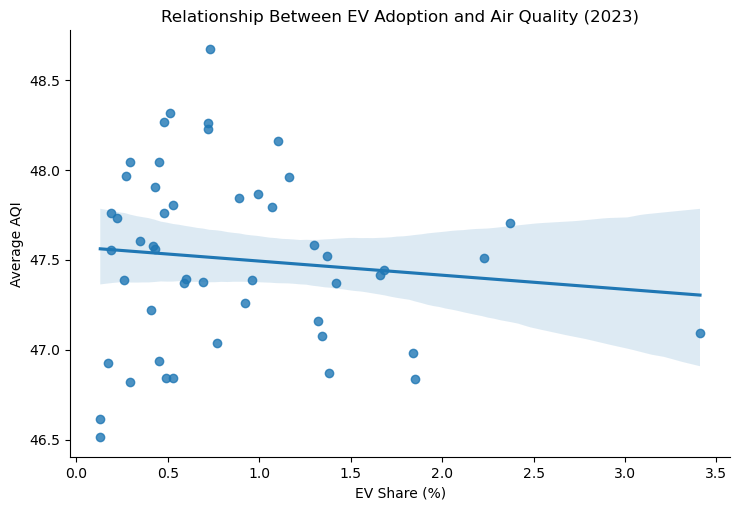

In [82]:
df_merge = df_2023.merge(
    df_air_quality.groupby("state")["aqi"].mean().reset_index(),
    on="state",
    how="inner"
)

sns.lmplot(
    data=df_merge,
    x="EV Share (%)",
    y="aqi",
    height=5,
    aspect=1.5
)

plt.title("Relationship Between EV Adoption and Air Quality (2023)")
plt.xlabel("EV Share (%)")
plt.ylabel("Average AQI")
plt.show()
